## Lead Scoring Case Study

### Importing and Understanding Data

In [308]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

In [310]:
# Importing leads.csv
leads = pd.read_csv(r'C:\Users\asahoo4.EAD\Python Notebook\Machine Learning\Lead Scoring Case Study\Lead Scoring Assignment\leads.csv')

In [311]:
# Looking at the first five rows
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [312]:
leads.shape

(9240, 37)

In [313]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Cleaning

In [314]:
# Replace 'Select' with Null values 'NaN'
leads = leads.replace('Select',np.nan)

In [315]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

In [316]:
# Checking the percentage of missing values
pd.set_option('display.max_rows', None)
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [317]:
# Let's drop columns having maximum % of missing values (>70%)
leads = leads.drop(['How did you hear about X Education','Lead Profile'], 1)

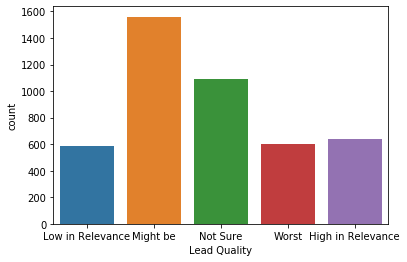

In [318]:
# Next top % missing values (>50%) for column 'Lead Quality'
# Let's plot this column
sns.countplot(leads['Lead Quality'])

In [319]:
# Though 'Might be' is more for Lead Quality, let's replace all NaN with 'Not Sure' as we are not sure of these values
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')

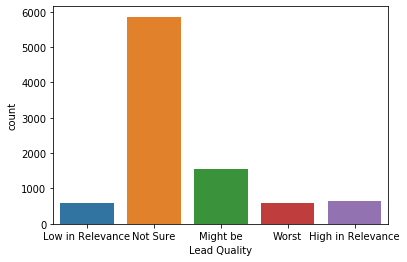

In [320]:
# Now plot this column
sns.countplot(leads['Lead Quality'])

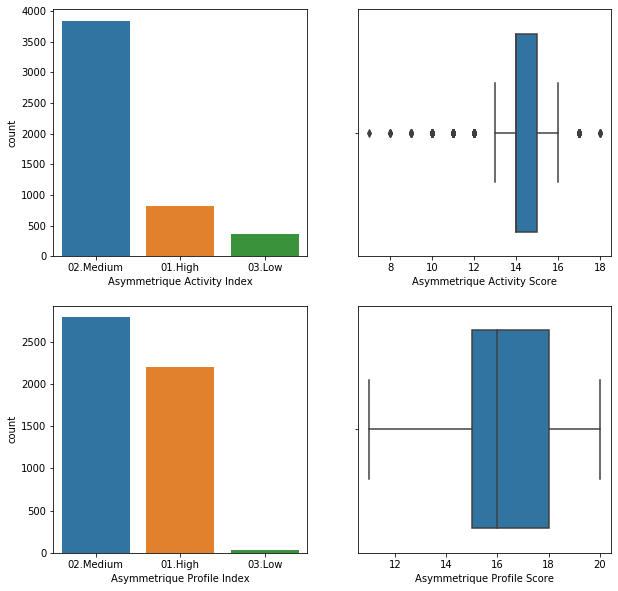

In [321]:
# Let's plot these columns
fig, axis = plt.subplots(2,2,figsize = (10,10))
sns.countplot(leads['Asymmetrique Activity Index'], ax = axis[0,0])
sns.boxplot(leads['Asymmetrique Activity Score'], ax = axis[0,1])
sns.countplot(leads['Asymmetrique Profile Index'], ax = axis[1,0])
sns.boxplot(leads['Asymmetrique Profile Score'], ax = axis[1,1])

In [322]:
# Since so much outliers in the data, instead of imputing it's better to drop these columns
leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

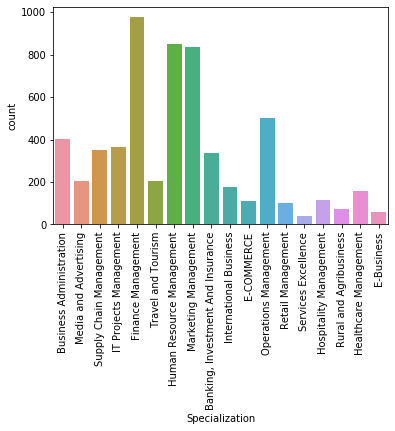

In [323]:
# Let's plot the column 'Specialization'
sns.countplot(leads['Specialization'])
xticks(rotation = 90)

In [324]:
# Since all the values look significant, let's replace NaN with 'Other_Specialization'
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

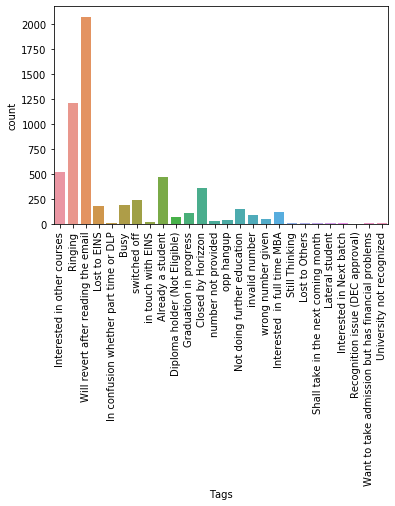

In [325]:
# Let's plot the column 'Tags'
sns.countplot(leads['Tags'])
xticks(rotation = 90)

In [326]:
# Since 'Will revert after reading the email' has maximum count, let's replace NaN with 'Will revert after reading the email'
leads['Tags'] = leads['Tags'].replace(np.nan,'Will revert after reading the email')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

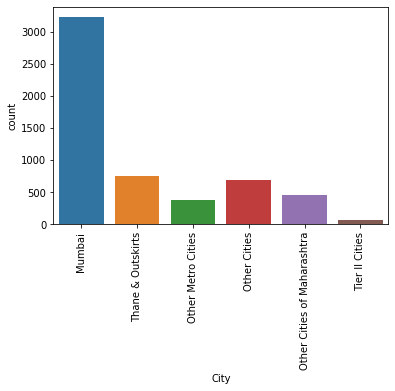

In [327]:
# Let's plot the column 'City'
sns.countplot(leads['City'])
xticks(rotation = 90)

In [328]:
# Since 'Mumbai' has maximum count, let's replace NaN with 'Mumbai'
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

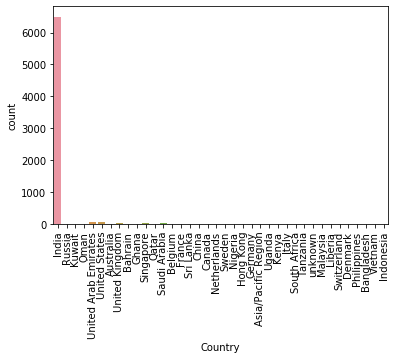

In [329]:
# Let's plot the column 'Country'
sns.countplot(leads['Country'])
xticks(rotation = 90)

In [330]:
# Since 'India' has maximum count, let's replace NaN with 'India'
leads['Country'] = leads['Country'].replace(np.nan,'India')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

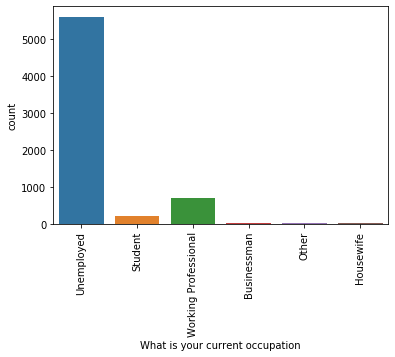

In [331]:
# Let's plot the column 'What is your current occupation'
sns.countplot(leads['What is your current occupation'])
xticks(rotation = 90)

In [332]:
#Since 'Unemployed' has maximum count, let's replace NaN with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

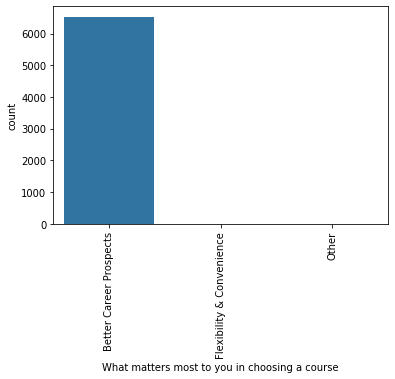

In [333]:
# Let's plot the column 'What matters most to you in choosing a course'
sns.countplot(leads['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [334]:
# Let's replace NaN with 'Better Career Prospects' as it has maximum count
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [335]:
# Let's see Missing % for all columns now
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [336]:
# Let's drop the rows which have very minimal % of missing values (0-2 %)
leads.dropna(inplace=True)

In [337]:
# let's again see missing % if any
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Univariate Analysis

### Converted

In [338]:
# Converted rate
Converted = 100*(sum(leads['Converted'])/len(leads['Converted'].index))
Converted

37.85541106458012

### Lead Number

(array([   0,    1,    2, ..., 9071, 9072, 9073]),
 <a list of 9074 Text xticklabel objects>)

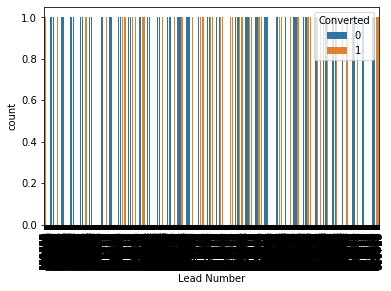

In [339]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Lead Number', hue = 'Converted', data = leads)
xticks(rotation = 90)

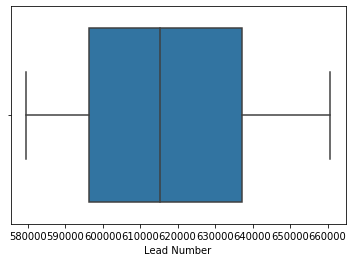

In [340]:
# Check outliers

sns.boxplot(leads['Lead Number'])

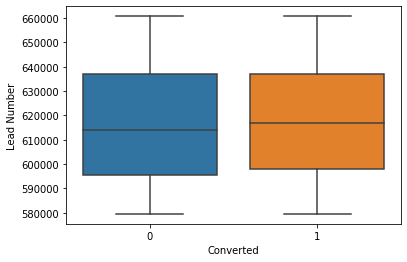

In [341]:
sns.boxplot(y = 'Lead Number', x = 'Converted', data = leads)

#### Inference
- Medians for both converted and not converted leads are almost same.
- Nothing can be derived out of this column. This can be ignored

### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

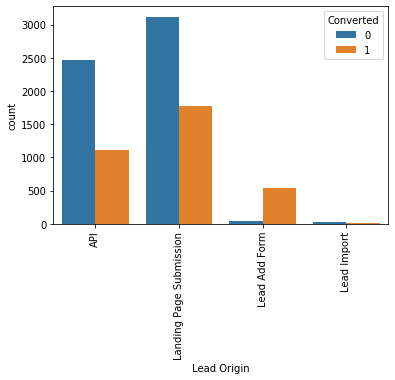

In [342]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- API and Landing Page Submission have significant conversion rate; but lead counts for both are considerable though it's not very high.
- Lead Add Form has high conversion rate; lead count is low as compared to API and Landing Page Submission.
- Lead count for Lead Import is negligible.

To improve conversion rate:
- Focus more on improving lead conversion rate of API and Landing Page Submission.
- Generate more leads from Lead Add Form.

### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

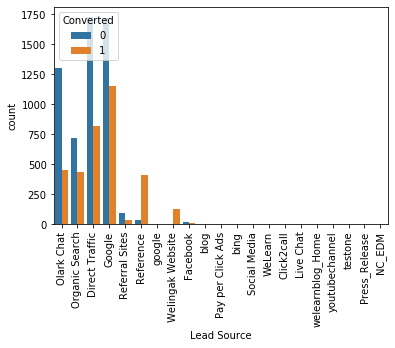

In [343]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
xticks(rotation = 90)

In [344]:
# Since there are two different names for same value i.e. 'google' and 'Google', let's replace 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
# Since some column values look insignificant w.r.t target variable, replace them with 'Other_Lead Source'
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead Source')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

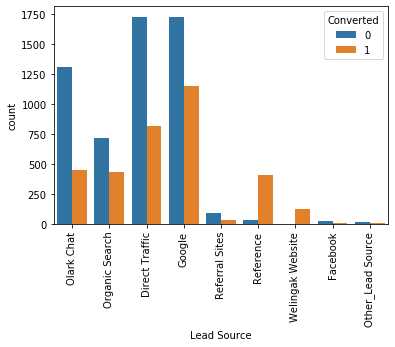

In [345]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
xticks(rotation = 90)

#### Inference
- Direct Traffic and Google have maximum lead counts.
- Reference and Welingak Website have high conversion rate; lead count is low as compared to Google and Direct Traffic.

To improve conversion rate:
- Focus more on improving lead conversion rate of Olark Chat, Organic Search, Direct Traffic and Google.
- Generate more leads from Reference and Welingak Website.

### Do Not Email

(array([0, 1]), <a list of 2 Text xticklabel objects>)

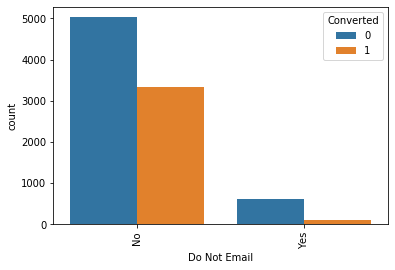

In [346]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Email has significant conversion rate and lead count is considerable
- Lead count for 'Do Not Email' is negligible.

To improve conversion rate:
- Focus more on improving lead conversion rate of Email.


### Do Not Call

(array([0, 1]), <a list of 2 Text xticklabel objects>)

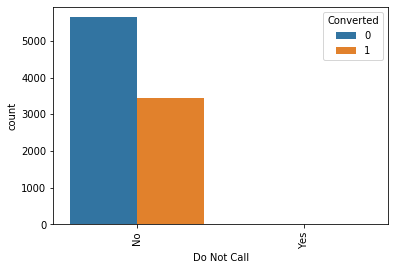

In [347]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Call has significant conversion rate and lead count is considerable
- 0 Lead count for 'Do Not Call'.

To improve conversion rate:
- Focus more on improving lead conversion rate of Call.


### TotalVisits

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

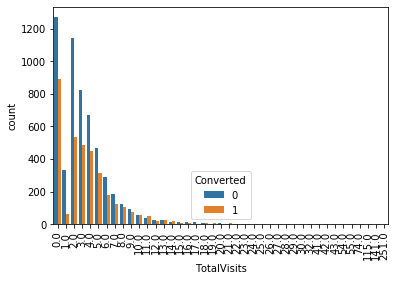

In [348]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'TotalVisits', hue = 'Converted', data = leads)
xticks(rotation = 90)

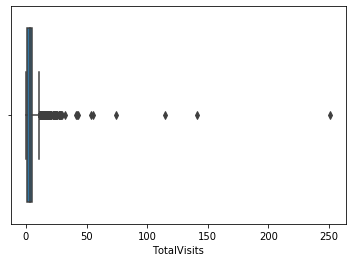

In [349]:
# Check outliers

sns.boxplot(leads['TotalVisits'])

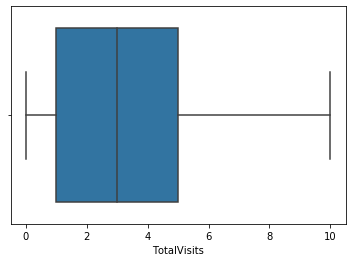

In [350]:
# As there are huge outliers, cap the outliers to 95%
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]
# plot
sns.boxplot(leads['TotalVisits'])

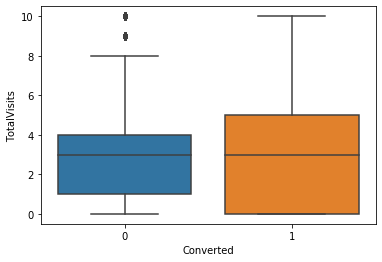

In [351]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

#### Inference
- Medians for both converted and not converted leads are same
- It's difficult to determine anything regarding lead conversion

### Total Time Spent on Website

(array([   0,    1,    2, ..., 1714, 1715, 1716]),
 <a list of 1717 Text xticklabel objects>)

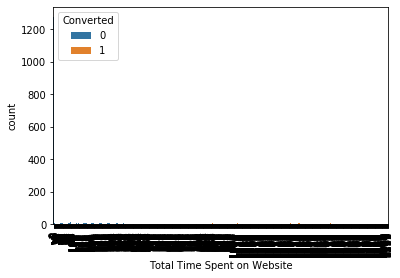

In [352]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Total Time Spent on Website', hue = 'Converted', data = leads)
xticks(rotation = 90)

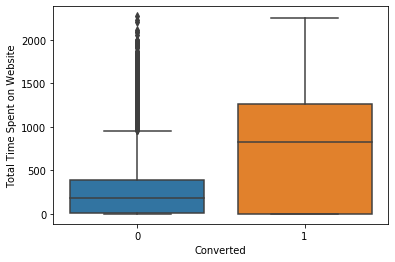

In [353]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)

#### Inference
- More the time leads visit website, there is more chance of conversion. 

To improve conversion rate:
- Focus more on improving website so that leads will tend to visit it more and more.


### Page Views Per Visit

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text xticklabel objects>)

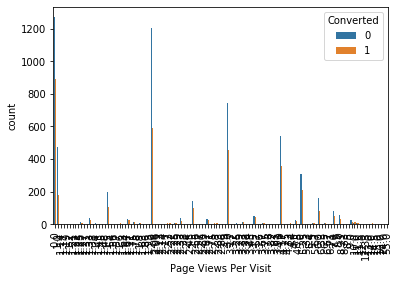

In [354]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Page Views Per Visit', hue = 'Converted', data = leads)
xticks(rotation = 90)

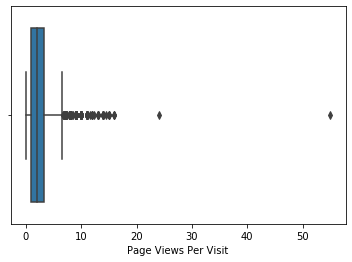

In [355]:
# Check outliers

sns.boxplot(leads['Page Views Per Visit'])

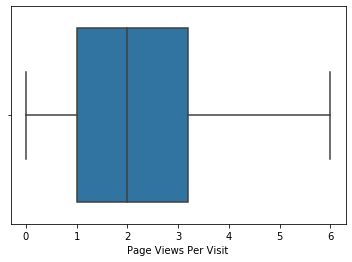

In [356]:
# As there are huge outliers, cap the outliers to 95%
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
# plot
sns.boxplot(leads['Page Views Per Visit'])

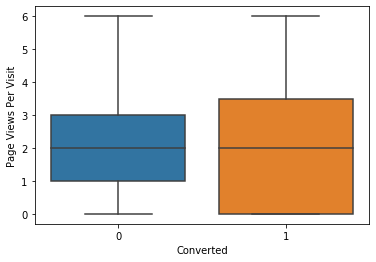

In [357]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

#### Inference
- Medians for both converted and not converted leads are same
- It's difficult to determine anything regarding lead conversion

### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

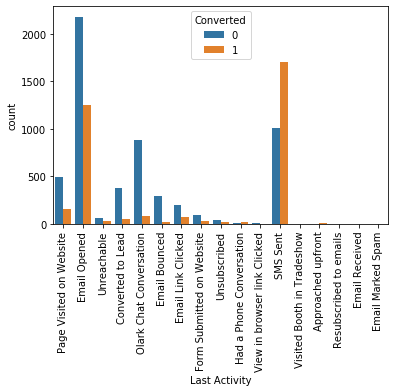

In [358]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Email Opened and SMS Sent have significant lead counts.
- conversion rate for SMS Sent is little High.

To improve conversion rate:
- Focus more on improving lead conversion rate of SMS Sent.
- Generate more leads from Email Opened.


### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

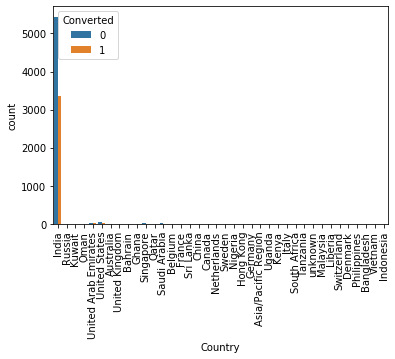

In [359]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Country', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Nothing can be derived out of this column as India has maximum leads counts. Other countries have negligible counts. So this column can be ignored

### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

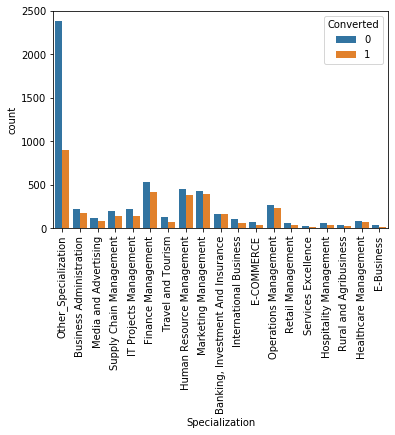

In [360]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Other_Specialization has high lead counts.
- Finance Management, Human Resource Management, Marketing Management have considerable lead counts.
- Operations management has less lead counts.

To improve conversion rate:

- Focus on Other_Specialization to improve conversion rate.
- Generate more leads from Finance Management, Human Resource Management, Marketing Management and Operations management.

### What is your current occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

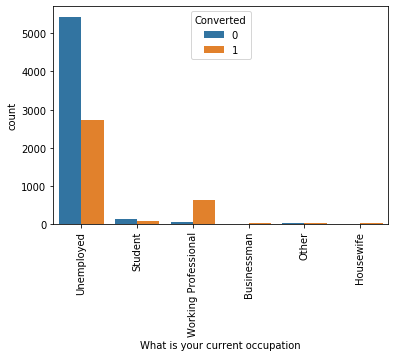

In [361]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Unemployed has more lead counts; but less conversion rate
- Working Professionals have high conversion rate

To improve conversion rate:
- Focus on improving conversion rate for Working Professionals
- Generate more leads from Unemployed

### What matters most to you in choosing a course

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

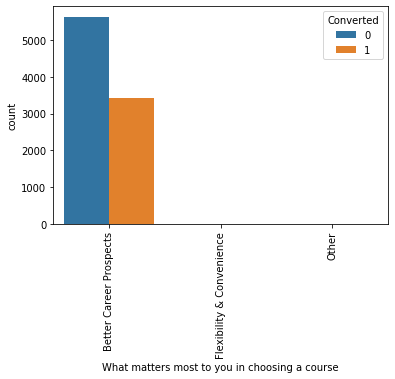

In [362]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Only 'Better Career Prospects' has lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Search

In [363]:
#Let's describe this column
leads['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Magazine

In [364]:
#Let's describe this column
leads['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

#### Inference
- Only 'No' has all lead counts 
- Nothing can be derived out of this column. So this column can be ignored

### Newspaper Article

In [365]:
#Let's describe this column
leads['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

#### Inference
- 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### X Education Forums

In [366]:
#Let's describe this column
leads['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Newspaper

In [367]:
#Let's describe this column
leads['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Digital Advertisement

In [368]:
#Let's describe this column
leads['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Through Recommendations

In [369]:
#Let's describe this column
leads['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Receive More Updates About Our Courses

In [370]:
#Let's describe this column
leads['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Tags

In [371]:
#Let's describe this column
leads['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

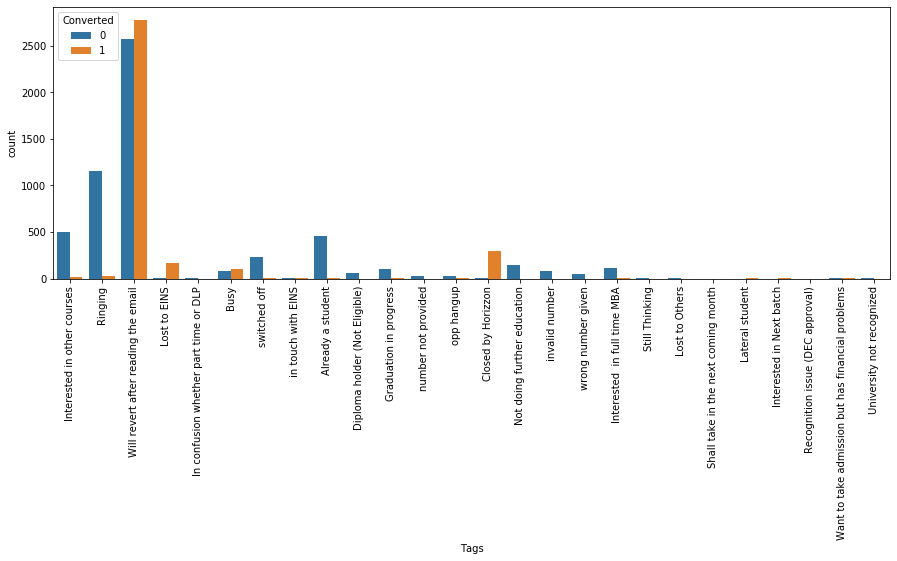

In [372]:
#Let's plot this column w.r.t. target variable
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = leads)
xticks(rotation = 90)

In [373]:
# Since some column values look insignificant w.r.t target variable, replace them with 'Others_Tags'
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Graduation in progress','number not provided', 'opp hangup', 'invalid number', 'wrong number given', 'Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

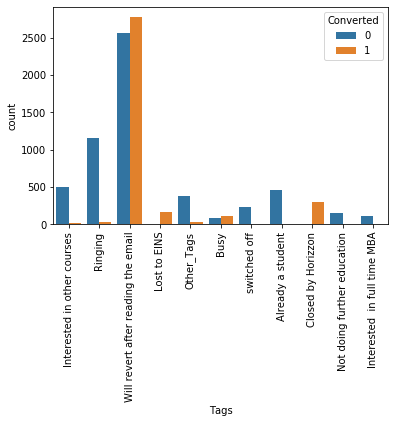

In [374]:
sns.countplot(x = "Tags", hue = "Converted", data = leads)
xticks(rotation = 90)

#### Inference
- Will revert after reading the email has maximum lead counts.
- Lost to EINS, Busy and Closed by Horizon have considerable lead counts.

To improve conversion rate:
- Focus more on improving lead conversion rate of Will revert after reading the email.

### Lead Quality 

In [375]:
#Let's describe this column
leads['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

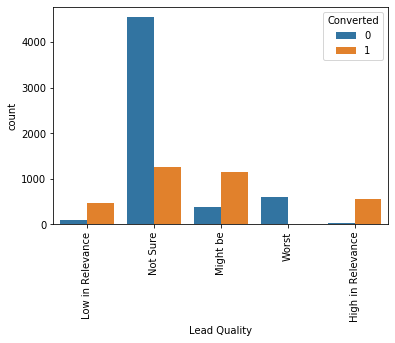

In [376]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Lead Quality', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Not sure and Might be have more lead counts.
- Low in Relevance and High in Relevance have considerable lead counts.

To improve conversion rate:
- Focus more on improving lead conversion rate of Not Sure and Might be.

### Update me on Supply Chain Content

In [377]:
#Let's describe this column
leads['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Get updates on DM Content

In [378]:
#Let's describe this column
leads['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### City

In [379]:
#Let's describe this column
leads['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

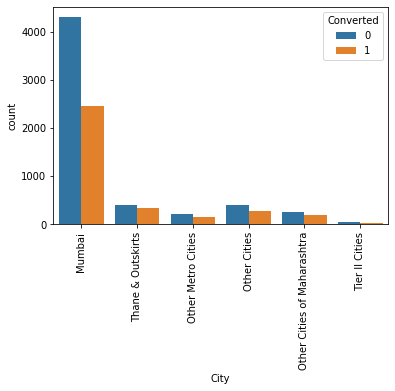

In [380]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'City', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- Mumbai has maximum lead counts.
- Thane & Outskirts and Other Cities have considerable lead counts.

To improve conversion rate:
- Focus more on improving lead conversion rate of Mumbai.

### I agree to pay the amount through cheque

In [381]:
#Let's describe this column
leads['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

#### Inference
- Only 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### A free copy of Mastering The Interview

In [382]:
#Let's describe this column
leads['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

#### Inference
- 'No' has maximum lead counts
- Nothing can be derived out of this column. So this column can be ignored

### Last Notable Activity

In [383]:
#Let's describe this column
leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

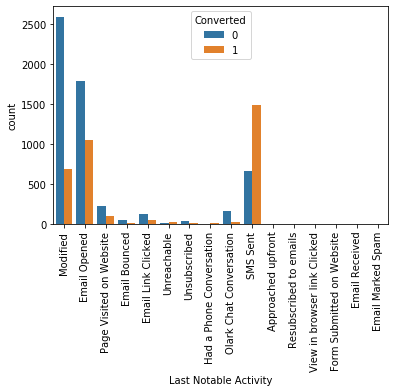

In [384]:
#Let's plot this column w.r.t. target variable
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads)
xticks(rotation = 90)

#### Inference
- SMS Sent has more lead counts.
- Email Opened and Modified have considerable lead counts.

To improve conversion rate:
- Focus more on improving lead conversion rate of SMS Sent.
- Generate more leads from Email Opened and Modified.

## Outcome

In [385]:
# Since many columns are not contributing much in lead conversion, let's drop them
leads = leads.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                    'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [386]:
leads.shape

(9074, 16)

In [387]:
leads.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

## Data Preparation

In [388]:
# Converting Yes to 1 and No to 0
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})
leads['Do Not Call'] = leads['Do Not Call'].map({'Yes': 1, 'No': 0})

### Dummy Variables

Create Dummy Variables for below columns

In [389]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lo = pd.get_dummies(leads['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,lo],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
ls = pd.get_dummies(leads['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,ls],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
la = pd.get_dummies(leads['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,la],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
sp = pd.get_dummies(leads['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,sp],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
oc = pd.get_dummies(leads['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,oc],axis=1)

# Creating a dummy variable for the variable 'Tags' and dropping the first one.
tag = pd.get_dummies(leads['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,tag],axis=1)

# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.
lq = pd.get_dummies(leads['Lead Quality'],prefix='Lead Quality',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,lq],axis=1)

# Creating a dummy variable for the variable 'City' and dropping the first one.
cty = pd.get_dummies(leads['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,cty],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
ln = pd.get_dummies(leads['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,ln],axis=1)

In [390]:
leads.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other_Lead Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                     

In [391]:
# Drop the columns for which dummy variables are created
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags',
                    'Lead Quality','City','Last Notable Activity'], axis = 1)

In [392]:
leads.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           0                             0   
4                           0                     

### Checking the Conversion Rate

In [393]:
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.85541106458012

## Model Building

### Splitting Data into Training and Test Sets

In [394]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Converted','Prospect ID'],axis=1)

# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [395]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Feature Scaling

In [396]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [397]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

var1 = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[var1] = scaler.fit_transform(X_train[var1])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other_Lead Source  \
3009                           0                              0   
1012                           0                              0   
9226                           0                              0   
4750                           0                              0   
7987                           0                              0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
3009                             0                                0   
1012                             0                                0   
9226                             0                                0   
4750                             0                                0   
7987                             0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3009                            0                                 0   
1012                            1                                 0   
9226                            0                                 0   
4750                            0                                 0   
7987                            0                                 0   

      Last Activity_Email Marked Spam  Last Activity_Email Opened  \
3009                                0                           1   
1012                                0                           0   
9226                                0                           0   
4750                                0                           0   
7987                                0                           0   

      Last Activity_Email Received  Last Activity_Form Submitted on Website  \
3009                             0                                        0   
1012                             0                                        0   
9226                             0                                    

In [398]:
# Checking the Conversion Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

## Model Building

### Running First Training Model

In [399]:
import statsmodels.api as sm

In [400]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           87
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1257.7
Date:                Mon, 09 Mar 2020   Deviance:                       2515.4
Time:                        11:38:30   Pearson chi2:                 3.76e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.6548   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.3271      0.325     -4.078      0.000      -1.965      -0.689
Do Not Call                                             21.6816   5.03e+04      0.000      1.000   -9.86e+04    9.86e+04
TotalVisits                                              0.1756      0.086      2.031      0.042       0.006       0.345
Total Time Spent on Website                              1.1400      0.064     17.909      0.000       1.015       1.265
Page Views Per Visit                                    -0.3194      0.098     -3.246      0.001      -0.512      -0.127
Lead Origin_Landing Page Submission                     -1.0018      0.222     -4.520      0.000      -1.436      -0.567
Lead Origin_Lead Add Form                               -0.3552      1.304     -0.272      0.785      -2.912       2.201
Lead Origin_Lead Import                                 27.6450   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -26.6196   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.2198      0.154      1.426      0.154      -0.082       0.522
Lead Source_Olark Chat                                   0.8755      0.233      3.756      0.000       0.419       1.332
Lead Source_Organic Search                               0.2448      0.209      1.169      0.242      -0.165       0.655
Lead Source_Other_Lead Source                            0.7978      0.809      0.986      0.324      -0.788       2.384
Lead Source_Reference                                    1.7695      1.362      1.299      0.194      -0.899       4.438
Lead Source_Referral Sites                              -0.0778      0.491     -0.158      0.874      -1.041       0.885
Lead Source_Welingak Website                             5.4104      1.501      3.605      0.000       2.469       8.352
Last Activity_Converted to Lead                        -17.2541   3.66e+04     -0.000      1.000   -7.18e+04    7.18e+04
Last Activity_Email Bounced                            -17.8483   3.66e+04     -0.000      1.000   -7.18e+04    7.18e+04
Last Activity_Email Link Clicked                       -16.4313   3.66e+04     -0.000      1.000   -7.18e+04    7.18e+04
Last Activity_Email Marked Spam                          0.2039   4.72e+04   4.32e-06      1.000   -9.25e+04    9.25e+04
Last Activity_Email Opened                             -17.2626   3.66e+04     -0.000      1.000   -7.18e+04    7.18e+04
Last Activity_Email Received                             2

### Correlation Matrix

In [405]:
# Create Correlation Matrix
corr_matrix = leads.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
# Get list of columns with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [406]:
print(to_drop)

['Lead Source_Facebook', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Resubscribed to emails']


In [407]:
# Let's drop above highly correlated variables
X_test2 = X_test.drop(leads[to_drop],1)
X_train2 = X_train.drop(leads[to_drop],1)

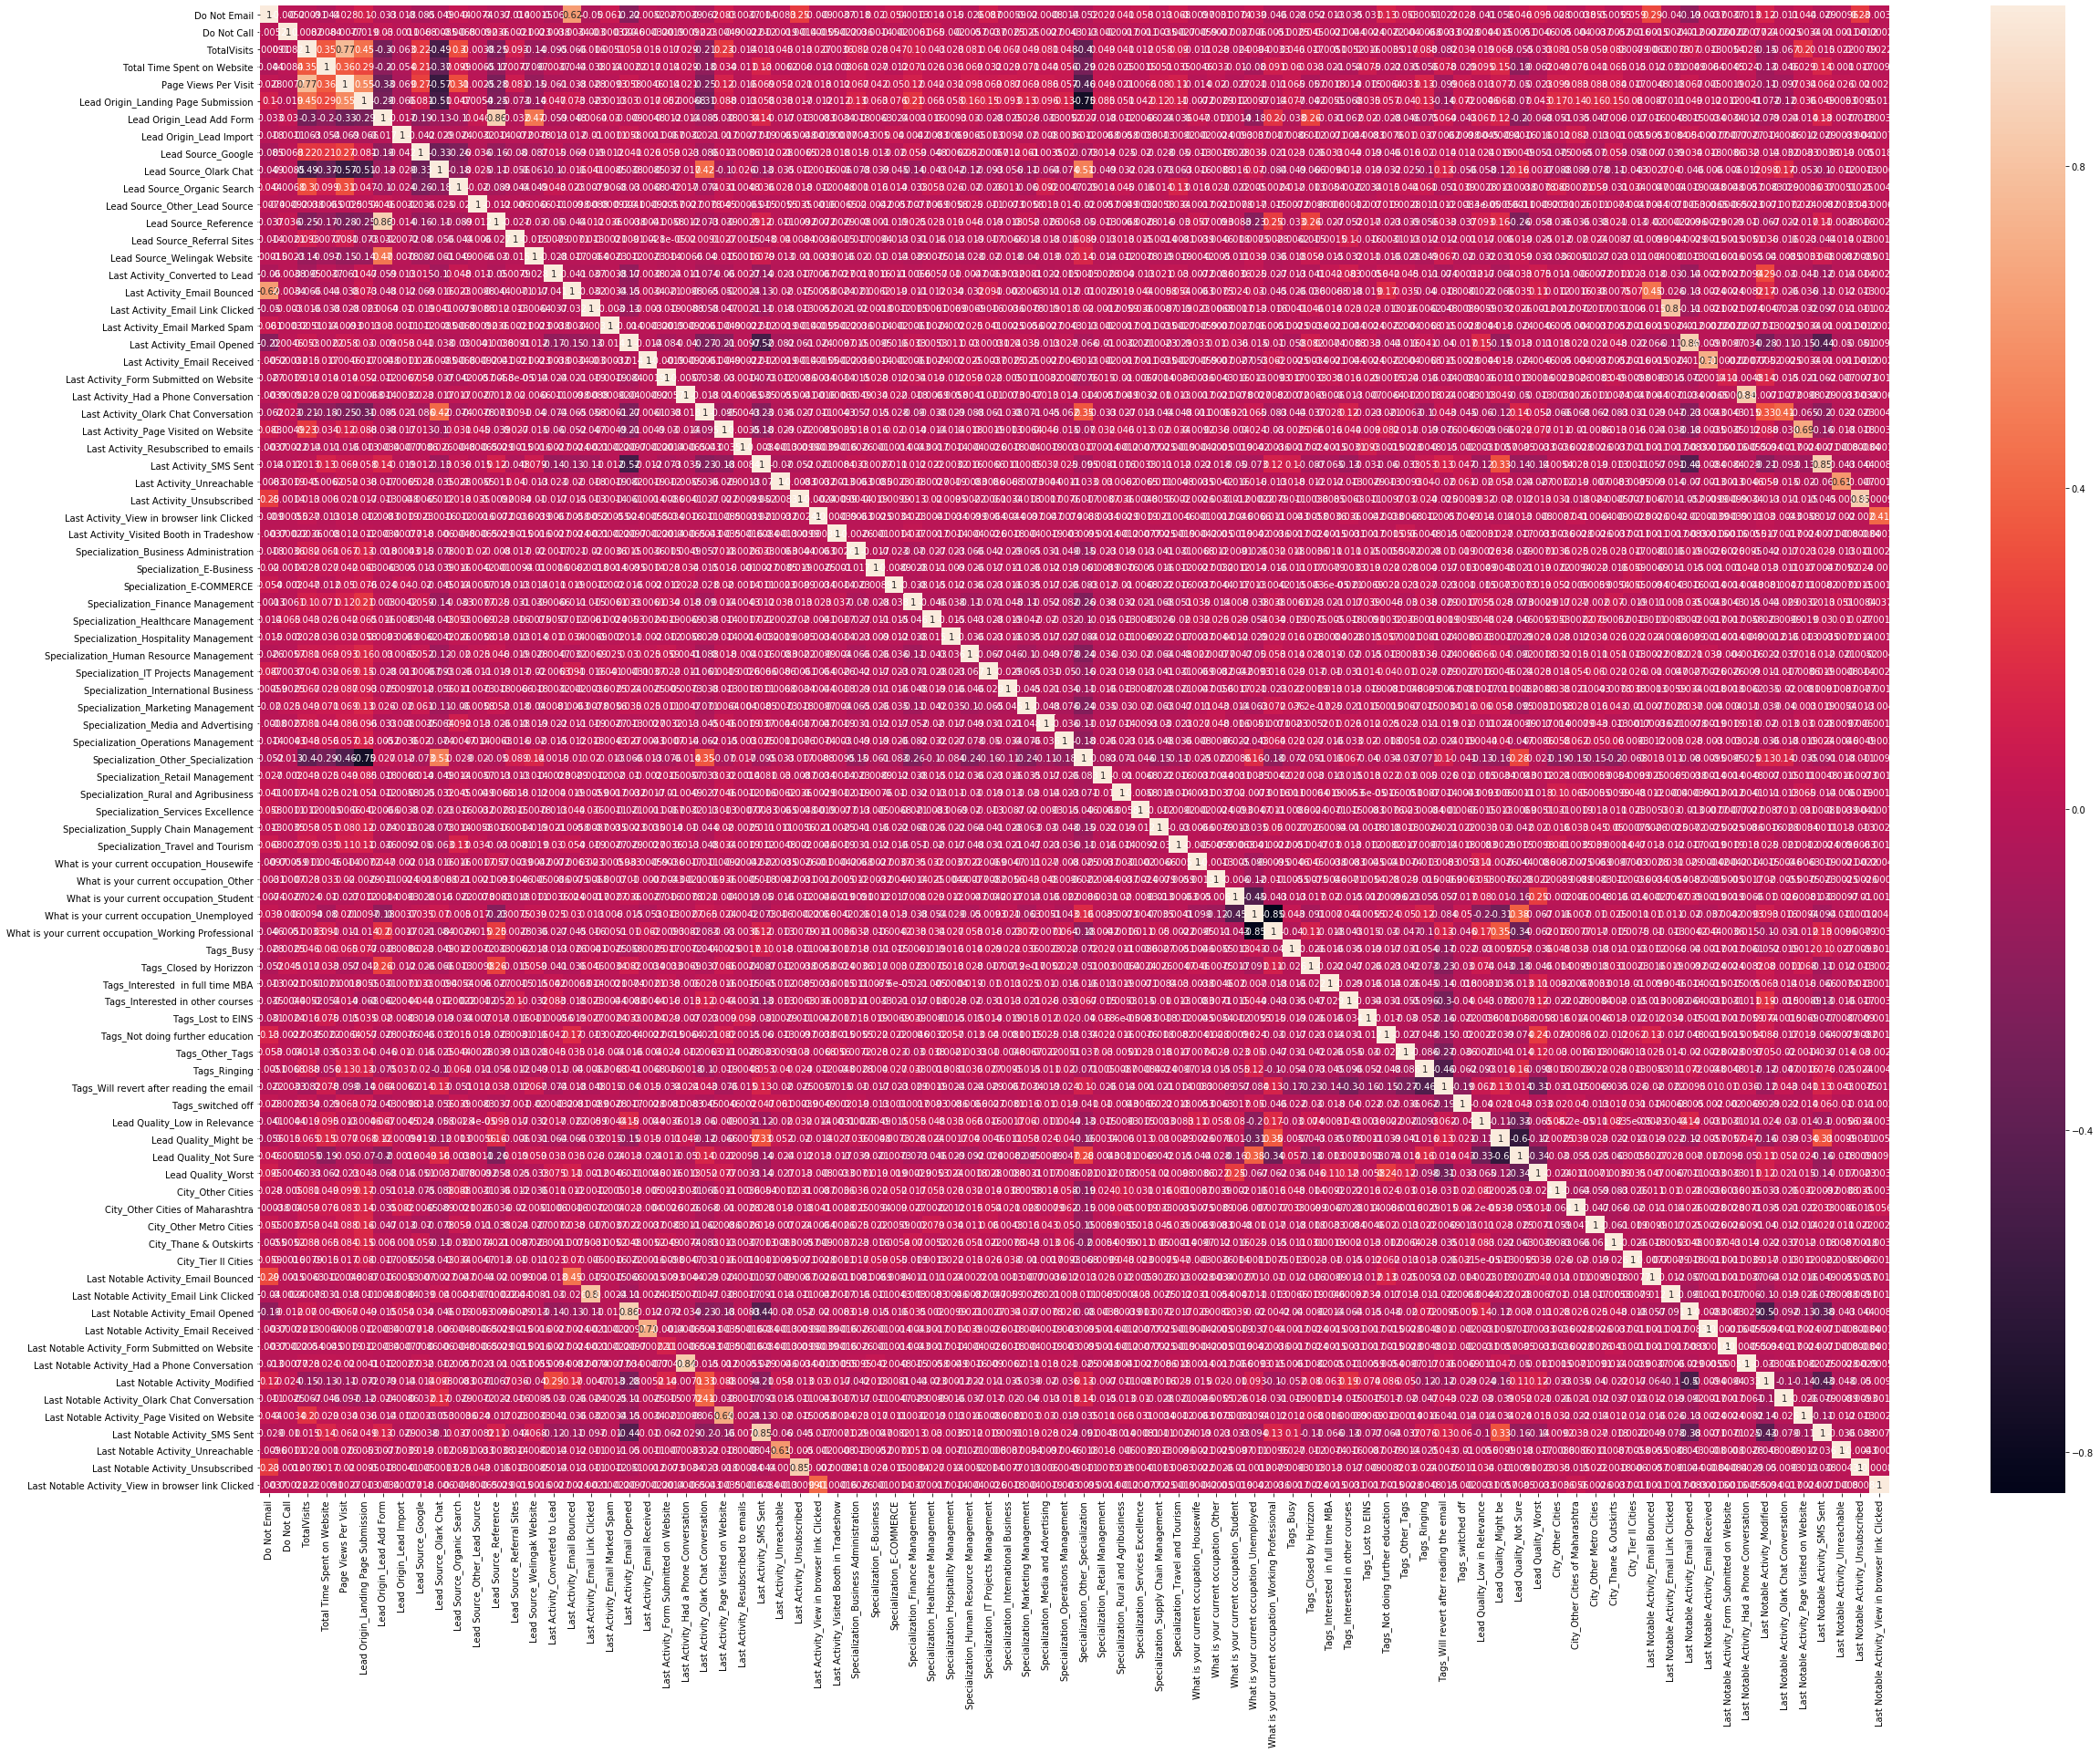

In [408]:
# Let's see the correlation matrix after dropping highly correlated variables
plt.figure(figsize = (40,30))
sns.heatmap(X_train2.corr(),annot = True)

### Re-running the Model

In [409]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.6
Date:                Mon, 09 Mar 2020   Deviance:                       2521.2
Time:                        13:21:32   Pearson chi2:                 3.68e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.7260   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.3173      0.325     -4.059      0.000      -1.953      -0.681
Do Not Call                                             21.6383   5.03e+04      0.000      1.000   -9.87e+04    9.87e+04
TotalVisits                                              0.1769      0.086      2.049      0.040       0.008       0.346
Total Time Spent on Website                              1.1403      0.064     17.937      0.000       1.016       1.265
Page Views Per Visit                                    -0.3248      0.098     -3.305      0.001      -0.517      -0.132
Lead Origin_Landing Page Submission                     -1.0226      0.222     -4.611      0.000      -1.457      -0.588
Lead Origin_Lead Add Form                               -0.3769      1.301     -0.290      0.772      -2.926       2.173
Lead Origin_Lead Import                                  1.0557      0.825      1.280      0.201      -0.561       2.672
Lead Source_Google                                       0.2297      0.154      1.493      0.135      -0.072       0.531
Lead Source_Olark Chat                                   0.8821      0.233      3.788      0.000       0.426       1.339
Lead Source_Organic Search                               0.2567      0.209      1.228      0.219      -0.153       0.666
Lead Source_Other_Lead Source                            0.8019      0.809      0.991      0.322      -0.785       2.388
Lead Source_Reference                                    1.7917      1.358      1.319      0.187      -0.870       4.454
Lead Source_Referral Sites                              -0.0654      0.491     -0.133      0.894      -1.028       0.897
Lead Source_Welingak Website                             5.4385      1.498      3.632      0.000       2.503       8.374
Last Activity_Converted to Lead                        -17.2646   3.66e+04     -0.000      1.000   -7.18e+04    7.17e+04
Last Activity_Email Bounced                            -17.8662   3.66e+04     -0.000      1.000   -7.18e+04    7.17e+04
Last Activity_Email Link Clicked                       -16.4515   3.66e+04     -0.000      1.000   -7.18e+04    7.17e+04
Last Activity_Email Marked Spam                          0.3640   9.44e+04   3.86e-06      1.000   -1.85e+05    1.85e+05
Last Activity_Email Opened                             -17.2817   3.66e+04     -0.000      1.000   -7.18e+04    7.17e+04
Last Activity_Email Received                             2.8331   8.75e+04   3.24e-05      1.000   -1.71e+05    1.71e+05
Last Activity_Form Submitted on Website                -17

### Feature Selection Using RFE

In [410]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [412]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [413]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 34),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Other_Lead Source', False, 42),
 ('Lead Source_Reference', False, 72),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 32),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 57),
 ('Last Activity_Email Marked Spam', False, 51),
 ('Last Activity_Email Opened', False, 45),
 ('Last Activity_Email Received', False, 67),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Had a Phone 

In [414]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [415]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_B

### Building Model using StatsModel

In [416]:
# Statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.2
Date:                Mon, 09 Mar 2020   Deviance:                       2806.3
Time:                        15:26:16   Pearson chi2:                 2.06e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2726      0.227    -10.024      0.000      -2.717      -1.828
Do Not Email                                            -1.4390      0.229     -6.288      0.000      -1.887      -0.990
Total Time Spent on Website                              0.9290      0.051     18.387      0.000       0.830       1.028
Lead Origin_Lead Add Form                                2.0604      0.362      5.687      0.000       1.350       2.771
Lead Origin_Lead Import                                  1.3982      0.735      1.902      0.057      -0.042       2.839
Lead Source_Welingak Website                             3.2206      0.819      3.930      0.000       1.614       4.827
What is your current occupation_Working Professional     1.3679      0.321      4.260      0.000       0.739       1.997
Tags_Busy                                                3.3877      0.333     10.174      0.000       2.735       4.040
Tags_Closed by Horizzon                                  7.7626      0.776     10.005      0.000       6.242       9.283
Tags_Lost to EINS                                        8.8895      0.760     11.691      0.000       7.399      10.380
Tags_Ringing                                            -1.6379      0.345     -4.747      0.000      -2.314      -0.962
Tags_Will revert after reading the email                 3.8825      0.236     16.471      0.000       3.420       4.344
Tags_switched off                                       -2.3126      0.606     -3.815      0.000      -3.501      -1.125
Lead Quality_Not Sure                                   -3.0407      0.134    -22.755      0.000      -3.303      -2.779
Lead Quality_Worst                                      -3.6803      0.891     -4.129      0.000      -5.427      -1.933
Last Notable Activity_SMS Sent                           2.6393      0.128     20.646      0.000       2.389       2.890
========================================================================================================================
"""

### Making Predictions on Train Set

In [417]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.70834650e-01, 1.18821858e-01, 4.19180959e-04, 9.39066849e-01,
       9.95724618e-01, 9.93945373e-01, 9.53834474e-02, 9.22899505e-01,
       9.84570045e-01, 5.35104368e-03])

In [418]:
# Create dataframe with column 'Converted' and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.170835         3009
1          0        0.118822         1012
2          0        0.000419         9226
3          1        0.939067         4750
4          1        0.995725         7987

In [419]:
# Create new column 'Predicted' if Converted_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_df.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          0        0.170835         3009          0
1          0        0.118822         1012          0
2          0        0.000419         9226          0
3          1        0.939067         4750          1
4          1        0.995725         7987          1

### Model Evaluation

In [420]:
from sklearn import metrics

In [421]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3702,  203],
       [ 293, 2153]], dtype=int64)

In [422]:
# Predicted     not_Converted Converted
# Actual
# not_Converted        3702      203
# Converted            293       2153

In [423]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9219020626672965

### VIFs

In [424]:
# Check VIF values of feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [425]:
# Create a dataframe having feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                              Lead Quality_Not Sure  2.91
10           Tags_Will revert after reading the email  2.89
2                           Lead Origin_Lead Add Form  1.76
14                     Last Notable Activity_SMS Sent  1.55
9                                        Tags_Ringing  1.54
4                        Lead Source_Welingak Website  1.36
5   What is your current occupation_Working Profes...  1.26
1                         Total Time Spent on Website  1.19
7                             Tags_Closed by Horizzon  1.17
6                                           Tags_Busy  1.12
0                                        Do Not Email  1.10
11                                  Tags_switched off  1.10
8                                   Tags_Lost to EINS  1.07
13                                 Lead Quality_Worst  1.03
3                             Lead Origin_Lead Import  1.01

### Other Metrics

In [426]:
# True Positive
TP = confusion[1,1] 
# True Negative
TN = confusion[0,0] 
# False Poistive
FP = confusion[0,1] 
# False Negative
FN = confusion[1,0] 

In [427]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8802125919869174

In [428]:
# specificity
TN / float(TN+FP)

0.9480153649167734

In [429]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.051984635083226635


In [430]:
# positive predictive value 
print (TP / float(TP+FP))

0.9138370118845501


In [431]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9266583229036295


### ROC Curve

In [432]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

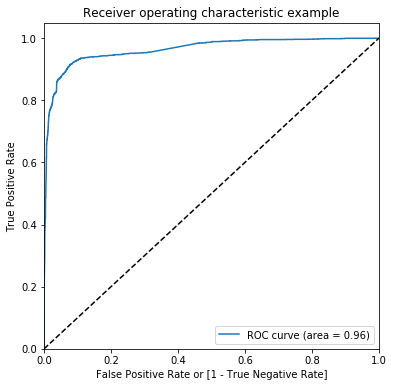

(array([0.        , 0.        , 0.        , ..., 0.99948784, 0.99974392,
        1.        ]),
 array([0.00000000e+00, 4.08830744e-04, 8.17661488e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99998866e+00, 9.99988664e-01, 9.99984465e-01, ...,
        7.53457095e-05, 7.47063385e-05, 6.00632986e-05]))

In [433]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Optimal Cutoff Points
(Point where balanced sensitivity and specificity meets)

In [434]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.170835         3009          0    1    1    0    0    0   
1          0        0.118822         1012          0    1    1    0    0    0   
2          0        0.000419         9226          0    1    0    0    0    0   
3          1        0.939067         4750          1    1    1    1    1    1   
4          1        0.995725         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    1    1    1    1    1

In [435]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.798614     0.953393     0.701665
0.2          0.2  0.906471     0.936222     0.887836
0.3          0.3  0.917021     0.921504     0.914213
0.4          0.4  0.919855     0.904334     0.929577
0.5          0.5  0.920800     0.876942     0.948271
0.6          0.6  0.910723     0.826656     0.963380
0.7          0.7  0.903795     0.788226     0.976184
0.8          0.8  0.894977     0.750204     0.985659
0.9          0.9  0.870886     0.680294     0.990269


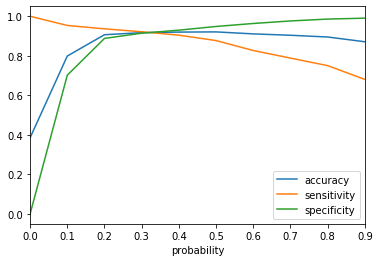

In [436]:
# Plot accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [437]:
#### From the curve above, 0.3 seems to be the optimal cutoff point 

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.170835         3009          0    1    1    0    0    0   
1          0        0.118822         1012          0    1    1    0    0    0   
2          0        0.000419         9226          0    1    0    0    0    0   
3          1        0.939067         4750          1    1    1    1    1    1   
4          1        0.995725         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    1                1  
4    1    1    1    1    1                1

### Lead Score Assignment

In [438]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.170835         3009          0    1    1    0    0    0   
1          0        0.118822         1012          0    1    1    0    0    0   
2          0        0.000419         9226          0    1    0    0    0    0   
3          1        0.939067         4750          1    1    1    1    1    1   
4          1        0.995725         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          17  
1    0    0    0    0    0                0          12  
2    0    0    0    0    0                0           0  
3    1    1    1    1    1                1          94  
4    1    1    1    1    1                1         100

In [439]:
# Let's check accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [440]:
# sensitivity 
TP / float(TP+FN)

0.9215044971381848

In [441]:
# specificity
TN / float(TN+FP)

0.9142125480153649

In [442]:
# False Positive rate
print(FP/ float(TN+FP))

0.08578745198463508


In [443]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8706064117419853


In [444]:
# Negative predictive value
print (TN / float(TN+ FN))

0.94896331738437


### Precision

In [445]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3702,  203],
       [ 293, 2153]], dtype=int64)

In [446]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9138370118845501

### Recall

In [447]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8802125919869174

In [448]:
from sklearn.metrics import precision_score, recall_score

In [449]:
# precision score
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.9138370118845501

In [450]:
# recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8802125919869174

### Precision and Recall Tradeoff

In [451]:
from sklearn.metrics import precision_recall_curve

In [452]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [453]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

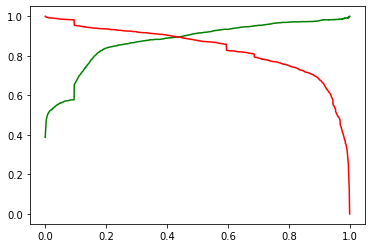

In [454]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [455]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3271             0            0     0.304501                    -0.591008   
1490             0            0     0.666261                     1.894051   
7936             0            0    -0.419021                    -0.743117   
4216             0            0    -1.142542                    -0.878732   
3830             0            0     1.751544                    -0.578179   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3271              0.998931                                    0   
1490              1.564920                                    1   
7936             -0.133048                                    0   
4216             -1.265027                                    0   
3830              2.130909                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3271                          0                        0   
1490                          0                        0   
7936                          0                        0   
4216                          1                        0   
3830                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3271                     0                   1                       0   
1490                     0                   0                       0   
7936                     0                   1                       0   
4216                     0                   0                       0   
3830                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other_Lead Source  \
3271                           0                              0   
1490                           0                              0   
7936                           0                              0   
4216                           0                              0   
3830                           1                              0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3271                      0                           0   
1490                      0                           0   
7936                      0                           0   
4216                      1                           0   
3830                      0                           0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
3271                             0                                0   
1490                             0                                0   
7936                             0                                0   
4216                             0                                0   
3830                             0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3271                            0                                 0   
1490                            0                                 0   
7936                            0                                 0   
4216                            0                                 0   
3830                            0                                 0   

      Last Activity_Email Marked Spam  Last Activity_Email Opened  \
3271                                0                           1   
1490                                0                           1   
7936                                0                           1   
4216                                0                           1   
3830                                0                           1   

      Last Activity_Email Received  Last Activity_Form Submitted on Website  \
3271                             0                                        0   
1490                             0                                        0   
7936                             0                                    

In [467]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271             0                    -0.591008                          0   
1490             0                     1.894051                          0   
7936             0                    -0.743117                          0   
4216             0                    -0.878732                          1   
3830             0                    -0.578179                          0   

      Lead Origin_Lead Import  Lead Source_Welingak Website  \
3271                        0                             0   
1490                        0                             0   
7936                        0                             0   
4216                        0                             0   
3830                        0                             0   

      What is your current occupation_Working Professional  Tags_Busy  \
3271                                                  0             0   
1490                                                  1             0   
7936                                                  0             0   
4216                                                  0             0   
3830                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
3271                        0                  0             0   
1490                        0                  0             0   
7936                        0                  0             0   
4216                        1                  0             0   
3830                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         1                  0   
1490                                         1                  0   
7936                                         1                  0   
4216                                         0                  0   
3830                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
3271                      1                   0   
1490                      0                   0   
7936                      1                   0   
4216                      0                   0   
3830                      1                   0   

      Last Notable Activity_SMS Sent  
3271                               0  
1490                               0  
7936                               0  
4216                               0  
3830                               0

In [468]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.121329
1490    0.991315
7936    0.107051
4216    0.998812
3830    0.122605
1800    0.908114
6507    0.007328
4821    0.000688
4223    0.995902
4714    0.095590
dtype: float64

In [470]:
# Let's convert y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

0
3271  0.121329
1490  0.991315
7936  0.107051
4216  0.998812
3830  0.122605

In [471]:
# Let's convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
3271          0
1490          1
7936          0
4216          1
3830          0

In [472]:
# Set Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [473]:
# Remove index for both dataframes
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [474]:
# Concatenate y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [475]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.121329
1          1         1490  0.991315
2          0         7936  0.107051
3          1         4216  0.998812
4          0         3830  0.122605

In [476]:
# Let's rename the last column 0
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Let's rearrange the columns as below
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         3271          0        0.121329
1         1490          1        0.991315
2         7936          0        0.107051
3         4216          1        0.998812
4         3830          0        0.122605

In [477]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.121329                0
1         1490          1        0.991315                1
2         7936          0        0.107051                0
3         4216          1        0.998812                1
4         3830          0        0.122605                0

In [478]:
# accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8982739625413148

In [479]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1531,  203],
       [  74,  915]], dtype=int64)

In [480]:
# True Positive 
TP = confusion2[1,1] 
# True Negative
TN = confusion2[0,0] 
# False Positive
FP = confusion2[0,1] 
# False Negative
FN = confusion2[1,0] 

In [481]:
# sensitivity
TP / float(TP+FN)

0.9251769464105156

In [482]:
# specificity
TN / float(TN+FP)

0.8829296424452133

In [483]:
# End of Prediction